### Where to Start with Machine Learning and Deep Learning? (Cont'df)

Let's have a look at a basic **multi-layer** program (adapted from:https://github.com/pkmital/CADL/blob/master/session-2/lecture-2.ipynb), and see if we can get a little creative with it.



In [1]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
import tensorflow as tf
import tensorflow.contrib.layers as tfl
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jonathan.she

In [2]:
# Parameters 
learning_rate = 0.05
training_epochs = 1000 #how many cycles of training
display_step = 50

You can compare this 'toy' model with Google's widget here: https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise

What is essential to notice is how the cost updates the **weight** and **bias** of our predicted output for Y. This allows our program to "fit" the data by charting a line through the central relationship between X and Y samples.

While our model is able to fit a straight line through linear data, it is quite limited. A straight line can only separate very linear data. What if our data is non-linear (e.g. curved) or if has significant outliers (extreme values)? A linear cost function won't work - Let's see if we can fit a quadratic cost function to such a data collection. 

### Network Layers and Nonlinear Activation Functions

Our model above has a major problem: the polynomial function we used for **regression** (our Y_pred prediction of the true Y given X) is not able to **generalize** well (meaning it cannot fit a wide variety of data ranges and features). While we could certainly find better machine learning algorithms than this poor polynomial regression or condition the data so it can fit, let's jump on the deep learning bandwagon and see how it can approach this problem. 

Deep learning has found that adding "layers" and **"activation"** functions can help models better fit more generalized data. You can think of layers as multiple levels of a process - for example instead of one instance of Y_pred = WX + b, we could do it several times in a chain, like: ```L1 = WX + b, and L2 = W*L1 + b and Y_pred = W*L2 + b```. So we pass the result of each layer to the next layer. And we can transform dimensions during this process too. It can get very technical, so we'll just focus on coding it and seeing it in action.

And for the so-called activation functions, you can think of these as functions that give a certain shape to a range of numbers. These activation functions are generally **nonlinear**, and common examples are tanh, sigmoid and relu. See below

Here instead of feeding our training examples 1 by 1, we are going to feed them by **batches**. Batches are groups of samples, and this has some benefits. First, they can be more computationally efficient (on GPUs) by grouping array operations. Second, if we randomize the examples in the batches, we can help ensure that our model is not learning *based on the repeating order of training examples*, as this could greatly distort the performance capabilities of the model in a real setting.

In [3]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        cost = tf.reduce_mean(tf.abs(Y_pred - Y))
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

        # We now run a loop over epochs
        for it_i in range(n_iterations):
            # scrambles the order of data so the model can't learn what comes next
            idxs = np.random.permutation(range(len(train_X)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: train_X[idxs_i], Y: train_Y[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})

            if it_i % 50 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: train_X}, session=sess)
                fig, ax = plt.subplots(1, 1)
                ax.scatter(train_X, train_Y, alpha=0.99, c='r')
                ax.set_xlim([0, 1])
                ax.set_ylim([0, 1])
                ax.plot(train_X, ys_pred, 'k', alpha=it_i / n_iterations, lw=4)
                print(training_cost, "interation %d" % (it_i))
                fig.show()
                plt.draw()
                plt.show()
    


In [4]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        if activation is None:
            h = tf.matmul(X, W) + b
        if activation is "tanh":
            h = tf.nn.tanh(tf.matmul(X, W) + b, name='tanh')
        if activation is "sigmoid":
            h = tf.nn.sigmoid(tf.matmul(X, W) + b, name='sigmoid')
        if activation is "relu":
            h = tf.nn.relu(tf.matmul(X, W) + b, name='relu')
        print(tf.shape(h))
        return h

(400, 600, 3)
(256, 768)


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
    Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """


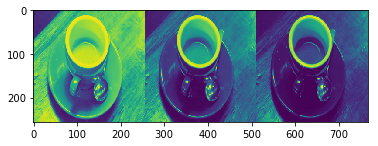

In [10]:
from skimage.data import coffee
from scipy.misc import imresize
print(coffee().shape)
img_rsz = imresize(coffee(), (256, 256))
img_3 = np.empty([256,768])
img_3[:256, :256] = img_rsz[:,:,0]
img_3[:256,256:512] = img_rsz[:,:,1]
img_3[:256,512:768] = img_rsz[:,:,2]
print(img_3.shape)
plt.imshow(img_3)
plt.show()

Let's see a single layer with the relu activation function, in which we input 1-node and output 10.

In [6]:
# We'll first collect all the positions in the image in our list, xs# We'll  
xs = []

# And the corresponding colors for each of these positions
ys = []

# Now loop over the image
for row_i in range(img_3.shape[0]):
    for col_i in range(img_3.shape[1]):
        # And store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img_3[row_i, col_i])    

# we'll convert our lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# add dim for ys (so tf treats it as matrix)

ys = np.expand_dims(ys, axis=1)

# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)

# and print the shapes
xs.shape, ys.shape

((196608, 2), (196608, 1))

In [7]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 1], name='Y')


n_neurons  = [2, 256, 256, 256, 1]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation="relu" if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

Tensor("layer_1/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_2/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_3/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_4/Shape:0", shape=(2,), dtype=int32)


0 29.901297
1 27.034462
2 25.982796
3 24.367556
4 24.444693
5 22.767487
6 22.731133
7 21.769873
8 20.993614
9 22.119003
10 19.716951
11 18.89551
12 19.581404
13 19.219078
14 18.238745
15 17.480667
16 17.302605
17 16.900343
18 16.49086
19 16.608225


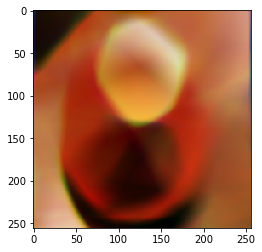

20 16.697382
21 16.976807
22 16.250963
23 16.357124
24 16.34811
25 15.681552
26 15.483325
27 15.701514
28 15.852592
29 14.877735
30 14.807454
31 15.945409
32 15.561828
33 14.4702215
34 14.572352
35 14.658803
36 13.76439
37 13.819153
38 13.856837
39 14.10984


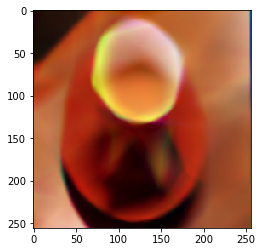

40 13.25664
41 13.226601
42 13.126521
43 12.915348
44 13.574287
45 13.45151
46 13.17686
47 12.901395
48 12.986923
49 13.236068
50 12.79919
51 12.791427
52 12.653523
53 12.012832
54 12.040051
55 12.368062
56 12.555537
57 12.302175
58 12.097489
59 11.580887


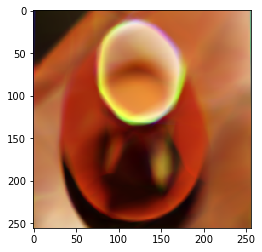

60 12.060234
61 12.039944
62 11.827976
63 11.798683
64 11.926704
65 11.577438
66 11.816562
67 11.796582
68 11.903928
69 11.949173
70 10.907182
71 11.870753
72 11.138579
73 11.381734
74 11.071747
75 11.239726
76 11.065407
77 11.186797
78 11.028365
79 11.16716


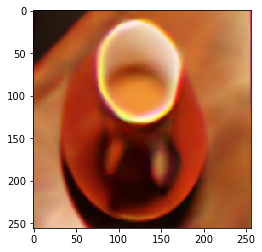

80 10.711747
81 10.902776
82 11.449052
83 10.898946
84 11.150857
85 10.482924
86 10.873527
87 11.083969
88 11.044192
89 10.789116
90 10.912459
91 10.700534
92 10.592152
93 11.677432
94 10.473701
95 10.764843
96 10.646182
97 10.449973
98 11.154338
99 10.737544


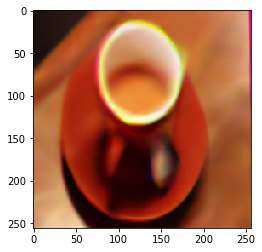

100 11.0162
101 10.828382
102 10.191947
103 10.332782
104 9.961276
105 9.856866
106 10.498614
107 10.385919
108 10.267398
109 10.694474
110 10.095754
111 10.838599
112 10.320375
113 10.566425
114 10.664611
115 9.9794445
116 9.93587
117 10.404859
118 10.419927
119 9.80039


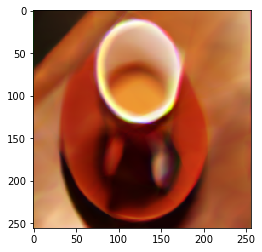

120 9.931713
121 10.024643
122 10.170607
123 10.414733
124 9.966134
125 10.673497
126 9.856371
127 11.15709
128 11.019885
129 9.890388
130 9.662646
131 10.164137
132 9.904702
133 9.751885


KeyboardInterrupt: 

In [8]:
cost = tf.reduce_mean(
    tf.reduce_sum(tf.abs(Y_pred - Y), 1))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

n_iterations = 500
batch_size = 50
img_out = np.empty([256, 768])
img_out_3 = np.empty([256,256,3])
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)

        if (it_i + 1) % 20 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img_out = np.clip(ys_pred.reshape(256, 768), 0, 255).astype(np.uint8)
            img_out_3[:256,:256,0] = img_out[:256,:256]
            img_out_3[:256,:256,1] = img_out[:256,256:512]
            img_out_3[:256,:256,2] = img_out[:256,512:768]
            plt.imshow(img_out_3.astype(np.uint8))
            plt.show()

We can also try to predict the normal (aka Gaussian) distribution instead of grayscale/rgb values. To do so we'll need to compute the means and standard deviation of our linear regression. This is called a **mixture density model**, or MDN. It's a bit ahead of where we need to be at this moment learning-wise, but perhaps the performance comparison is interesting. Note what we are doing is computing the density of Y given X (out of a possible total of 1. if all Y occured at a given X) and using this as our **cost function** instead of taking the mean of the absolute difference

In [35]:
from skimage.color import rgb2gray
tf.reset_default_graph()

img = imresize(rgb2gray(coffee()), (256, 256))

xs = []
ys = []
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        xs.append([row_i, col_i])
        ys.append(img[row_i, col_i])

xs = np.array(xs)
ys = np.array(ys)

xs = (xs - np.mean(xs)) / np.std(xs)
ys = (ys / 255.0)

# add dim for ys (so tf treats it as matrix)
ys = np.expand_dims(ys, axis=1)

/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
    Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  after removing the cwd from sys.path.


In [36]:
# probability density function
# Note: not sure if below or sigma out of sqrt is right
def gausspdf(x, mean, sigma):
    return tf.exp(-(x - mean)**2 /
                  (2 * sigma**2)) / (tf.sqrt(2.0 * np.pi * sigma))

#def gausspdf(x, mean, sigma):
#    dist = tf.contrib.distributions.Normal(mean, sigma) 
#    return dist.prob(x)

def build_single_gaussian_model(n_input_features=2,
                                n_output_features=1,
                                n_neurons =[32, 64, 32, 64]):

    
    X = tf.placeholder(tf.float32, shape=[None, n_input_features], name='X')
    Y = tf.placeholder(tf.float32, shape=[None, n_output_features], name='Y')
    
    current_input = X
    for layer_i in range(1, len(n_neurons)):
        current_input = tfl.linear(
            inputs=current_input,
            num_outputs=n_neurons[layer_i],
            activation_fn=tf.nn.relu if (layer_i+1) < len(n_neurons) else tf.nn.sigmoid,
            scope='layer_' + str(layer_i))
    means = tfl.linear(
        inputs=current_input,
        num_outputs=n_output_features,
        activation_fn=tf.nn.relu,
        scope='means')
    sigmas = tf.maximum(
        tfl.linear(
            inputs=current_input,
            num_outputs=n_output_features,
            activation_fn=tf.nn.relu,
            scope='sigmas'), 1e-8)

    p = gausspdf(Y, means, sigmas)
    negloglike = -tf.log(tf.maximum(p, 1e-8))
    cost = tf.reduce_mean(tf.reduce_sum(negloglike, 1))
    #cost = tf.reduce_mean(tf.reduce_mean(negloglike, 1))
    return X, Y, cost, means

cost: [0.30278474]
cost: [0.2469695]
cost: [0.22286564]
cost: [0.21295708]
cost: [0.42373872]
cost: [0.18544437]
cost: [0.16015624]
cost: [0.16650449]
cost: [0.18057431]
cost: [0.16731668]
cost: [0.15272364]
cost: [0.10793758]
cost: [0.1210561]
cost: [0.753675]
cost: [0.13548109]
cost: [0.3616231]
cost: [0.07545162]
cost: [0.054735936]
cost: [0.0295462]
cost: [0.20389909]


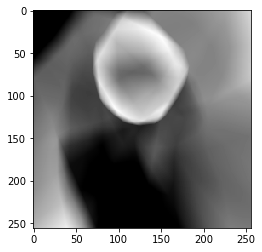

cost: [0.06299788]
cost: [0.01773262]
cost: [0.0597831]
cost: [0.43594298]
cost: [0.0116314385]
cost: [0.05059567]
cost: [-0.0033889525]
cost: [0.070996284]
cost: [-0.013807705]
cost: [0.27397308]
cost: [0.20658056]
cost: [-0.001990743]
cost: [0.31098753]
cost: [0.028697735]
cost: [0.0073938295]
cost: [0.03196561]
cost: [0.04697027]
cost: [0.05222167]
cost: [-0.0069127027]
cost: [0.07501054]


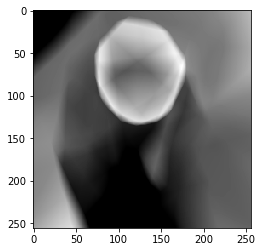

cost: [0.014695641]
cost: [-0.017360568]
cost: [-0.006019255]
cost: [-0.025513958]
cost: [-0.0016549975]
cost: [-0.037021738]
cost: [0.023654392]
cost: [0.54444766]
cost: [0.1270625]


KeyboardInterrupt: 

In [37]:
n_iterations = 500
batch_size = 128
with tf.Session() as sess:
    img_d = img
    X, Y, cost, means = build_single_gaussian_model()
    optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
    init_op = tf.global_variables_initializer()
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(init_op)
    # We now run a loop over epochs
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size:(batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
        this_cost = sess.run([cost], feed_dict={X: xs, Y: ys})
        print('cost:', this_cost)
        if (it_i + 1) % 20 == 0:
            ys_pred = means.eval(feed_dict={X: xs}, session=sess)
            #img = np.clip(ys_pred.reshape(img.shape), 0, 1)
            img_d = ys_pred.reshape(img_d.shape)
            img_d = img_d/np.amax(img_d)
            plt.imshow(img_d, cmap='gray')
            plt.show()